# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re

from collections import Counter
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
from wordcloud import WordCloud

# Load Dataset

In [2]:
dir_ = "dataset/"
file_labeled = dir_ + 'oshibe_spv_comments_2025-01-15_labeled.csv'
comments = pd.read_csv(file_labeled)
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11650 entries, 0 to 11649
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11650 non-null  object 
 1   Username       11650 non-null  object 
 2   Comment        11650 non-null  object 
 3   LikeCount      11650 non-null  int64  
 4   ReplyCount     11650 non-null  int64  
 5   Date           11650 non-null  object 
 6   Comment_clean  11650 non-null  object 
 7   Comment_size   11650 non-null  int64  
 8   Sentiment      11650 non-null  object 
 9   Confidence     11650 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 910.3+ KB


# Tokenization & Stemming

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Stemmer Initialization
indo_stemmer = StemmerFactory().create_stemmer()

# Combine English and Indonesian stopwords
indo_stopwords = set(stopwords.words('indonesian'))
eng_stopwords = set(stopwords.words('english'))
all_stopwords = indo_stopwords.union(eng_stopwords)

def clean_stem(comment):
    # Tokenization
    words = comment.lower().split()
    
    # Process each word
    processed_words = []
    for word in words:
        # Remove special characters and numeric values, keeping 'jkt48' & words start with 'gen'
        if word != 'jkt48' and not (word.startswith('gen') or re.match(r'^[a-zA-Z]+$', word)):
            continue
        
        if word in all_stopwords:
            continue
        
        # Stemming for Indonesian language
        stemmed = indo_stemmer.stem(word)
        processed_words.append(stemmed)
    
    # Recombine the processed words
    return ' '.join(processed_words)

# Apply the function with progress bar
tqdm.pandas(desc="Cleaning & Stemming Comments")
comments['Comment_stem'] = comments['Comment_clean'].progress_apply(clean_stem)

Cleaning & Stemming Comments: 100%|██████████| 11650/11650 [11:14<00:00, 17.26it/s] 


In [5]:
comments[['Comment', 'Comment_clean', 'Comment_stem']].head(10)

,Comment,Comment_clean,Comment_stem
0,"Guys, lagu ini bukan tentang LGBT, tapi tentan...","Guys, lagu ini bukan tentang LGBT, tapi tentan...",lagu gadis muda yg anjak dewasa hilang polos p...
1,Performance Videonya kaya memberitahu kita ten...,Performance Videonya kaya memberitahu kita ten...,performance video kaya memberitahu dampak buru...
2,Satu persatu member diberikan kesempatan buat...,Satu persatu member diberikan kesempatan buat ...,satu member sempat tunjuk biar gk iri wotanya ...
3,"fiks, kalau kedepan jkt48 release single MVnya...","fiks, kalau kedepan jkt48 release single MVnya...",depan jkt48 release single mvnya gak konsep ce...
4,Malam ini rahasia ya\nKamu tak boleh bilang si...,Malam ini rahasia ya Kamu tak boleh bilang sia...,malam rahasia ya bilang rahasia cahaya awan hi...
5,"Terlepas dari kontroversi yang ada, sejujurnya...","Terlepas dari kontroversi yang ada, sejujurnya...",lepas kontroversi jujur lagu representasi real...
6,Terlepas dari hate comen 18+. Jujur ini suatu ...,Terlepas dari hate comen 18+. Jujur ini suatu ...,lepas hate comen jujur maju banget konsep nger...
7,"Gila konsep MV nya keren banget, good job JKT48","Gila konsep MV nya keren banget, good job JKT48",gila konsep mv nya keren good job jkt48
8,Congrats JKT48 NEW ERA atas mini albumnya. JKT...,Congrats JKT48 NEW ERA atas mini albumnya. JKT...,congrats jkt48 new era mini jkt48 jaya jaya jaya
9,"buay yg blg lesbi itu salah besar ya, ini tuh ...","buay yg blg lesbi itu salah besar ya, ini tuh ...",buay yg blg lesbi salah tuh makna lumayan bera...


# Save to CSV

In [6]:
file_stem = file_labeled.replace(".csv", "_stem.csv")
comments.to_csv(file_stem, index=False)

# Overall Sentiment

In [7]:
file_stem = dir_ + "oshibe_spv_comments_2025-01-15_labeled_stem.csv"
comments = pd.read_csv(file_stem)

In [8]:
# Define Font Size & Colors
TITLE_FONT_SIZE = 15
JKT48_COLORS = ['red', 'darkgray', 'black']

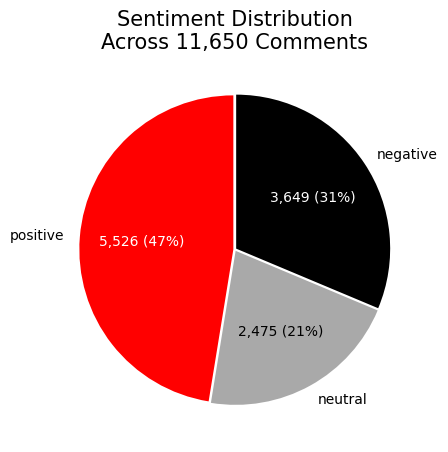

In [9]:
# Count the values in the Sentiment column and reorder
sentiment_order = ["positive", "neutral", "negative"]
sentiment_counts = comments['Sentiment'].value_counts()
sentiment_counts = sentiment_counts.reindex(sentiment_order)
total_count = len(comments)

# Create pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size for a square aspect ratio
wedges, texts, autotexts = plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    colors=JKT48_COLORS,
    startangle=90,
    autopct=lambda p: f'{int(p * total_count / 100):,} ({p:.0f}%)',
    explode=(0.01, 0.01, 0.01)  # Optional: explode the first slice for emphasis
)

# Set specific colors for the data labels inside the pie chart
for i, autotext in enumerate(autotexts):
    if i == 0 or i == 2:  # Positive and Negative
        autotext.set_color('white')  # Set to white for positive and negative
    else:  # Neutral
        autotext.set_color('black')  # Set to black for neutral

# Customize chart
plt.title(f'Sentiment Distribution\nAcross {total_count:,} Comments', fontsize=TITLE_FONT_SIZE)

plt.show()


- Secara keseluruhan, terdapat 47% komentar positif, 21 persen netral, dan 31 persen negatif

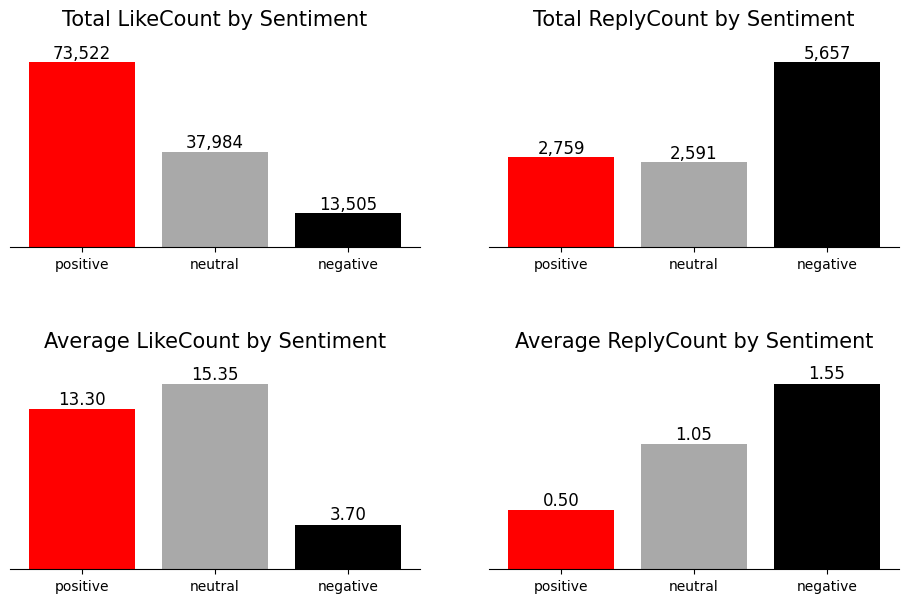

In [10]:
# Calculate total LikeCount and ReplyCount for each sentiment
like_counts = comments.groupby('Sentiment')['LikeCount'].sum().reindex(sentiment_order)
reply_counts = comments.groupby('Sentiment')['ReplyCount'].sum().reindex(sentiment_order)

# Calculate average LikeCount and ReplyCount per comment
average_like_counts = comments.groupby('Sentiment')['LikeCount'].mean().reindex(sentiment_order)
average_reply_counts = comments.groupby('Sentiment')['ReplyCount'].mean().reindex(sentiment_order)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Bar chart for LikeCount
bars1 = axs[0, 0].bar(
    like_counts.index,
    like_counts.values,
    color=JKT48_COLORS
)

# Add data labels for LikeCount
for bar, count in zip(bars1, like_counts.values):
    axs[0, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,  # Add extra space
        f"{count:,}",  # Format count with commas
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize LikeCount chart
axs[0, 0].set_title('Total LikeCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[0, 0].set_xticks(like_counts.index)
axs[0, 0].tick_params(axis='x', rotation=0)
axs[0, 0].set_yticks([])  # Remove y-axis ticks
axs[0, 0].spines['left'].set_visible(False)  # Remove y-axis line
axs[0, 0].spines['top'].set_visible(False)  # Remove top line
axs[0, 0].spines['right'].set_visible(False)  # Remove right line

# Bar chart for ReplyCount
bars2 = axs[0, 1].bar(
    reply_counts.index,
    reply_counts.values,
    color=JKT48_COLORS
)

# Add data labels for ReplyCount
for bar, count in zip(bars2, reply_counts.values):
    axs[0, 1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,  # Add extra space
        f"{count:,}",  # Format count with commas
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize ReplyCount chart
axs[0, 1].set_title('Total ReplyCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[0, 1].set_xticks(reply_counts.index)
axs[0, 1].tick_params(axis='x', rotation=0)
axs[0, 1].set_yticks([])  # Remove y-axis ticks
axs[0, 1].spines['left'].set_visible(False)  # Remove y-axis line
axs[0, 1].spines['top'].set_visible(False)  # Remove top line
axs[0, 1].spines['right'].set_visible(False)  # Remove right line

# Bar chart for Average LikeCount per comment
bars3 = axs[1, 0].bar(
    average_like_counts.index,
    average_like_counts.values,
    color=JKT48_COLORS
)

# Add data labels for Average LikeCount
for bar, count in zip(bars3, average_like_counts.values):
    axs[1, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.1,  # Add extra space
        f"{count:.2f}",  # Format count with two decimal places
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize Average LikeCount chart
axs[1, 0].set_title('Average LikeCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[1, 0].set_xticks(average_like_counts.index)
axs[1, 0].tick_params(axis='x', rotation=0)
axs[1, 0].set_yticks([])  # Remove y-axis ticks
axs[1, 0].spines['left'].set_visible(False)  # Remove y-axis line
axs[1, 0].spines['top'].set_visible(False)  # Remove top line
axs[1, 0].spines['right'].set_visible(False)  # Remove right line

# Bar chart for Average ReplyCount per comment
bars4 = axs[1, 1].bar(
    average_reply_counts.index,
    average_reply_counts.values,
    color=JKT48_COLORS
)

# Add data labels for Average ReplyCount
for bar, count in zip(bars4, average_reply_counts.values):
    y = bar.get_height() * 1.01
    axs[1, 1].text(
        bar.get_x() + bar.get_width() / 2,
        y,
        f"{count:.2f}",  # Format count with two decimal places
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize Average ReplyCount chart
axs[1, 1].set_title('Average ReplyCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[1, 1].set_xticks(average_reply_counts.index)
axs[1, 1].tick_params(axis='x', rotation=0)
axs[1, 1].set_yticks([])  # Remove y-axis ticks
axs[1, 1].spines['left'].set_visible(False)  # Remove y-axis line
axs[1, 1].spines['top'].set_visible(False)  # Remove top line
axs[1, 1].spines['right'].set_visible(False)  # Remove right line

# Adjust layout
plt.tight_layout(w_pad=5, pad=4)
plt.show()


- Komentar positif mendapatkan paling banyak like secara total, diikuti oleh komentar netral, sedangkan komentar negatif memiliki paling sedikit like.
- Namun demikian, justru komentar negatif yang mendapatkan paling banyak balasan dibanding komentar positif dan netral
- Rata-rata jumlah like per komentar tertinggi diperoleh komentar dengan sentimen netral, diikuti dengan sentimen positif dan negatif
- Rata-rata jumlah balasan tertinggi diraih oleh komentar negatif, diikuti oleh komentar netral dan positif

# Positive Sentiment

In [18]:
VIDEO_TITLE = "JKT48 New Era Special Performance Video – Benang Sari, Putik, dan Kupu-Kupu Malam"

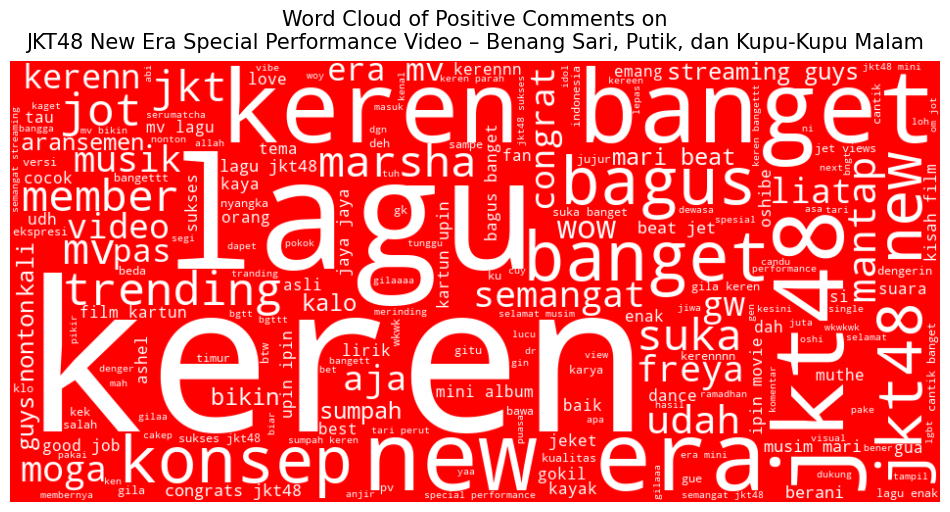

In [53]:
# Filter for positive comments
positive_comments = comments[comments['Sentiment'] == 'positive']['Comment_stem']

# Remove NaN values and filter out empty strings
positive_comments = positive_comments.dropna().loc[positive_comments != '']

# Remove occurrences of specified words
remove_words = ["nya", "ga", "gak", "nggak", "yg", "sih", "nih", "tp", "jg", "ya", "bgt"]
pattern = r'\b(' + '|'.join(remove_words) + r')\b'
positive_comments = positive_comments.str.replace(pattern, '', regex=True)

# Join all positive comments into a single string
positive_text = ' '.join(positive_comments)

# Generate the word cloud with all white text
wordcloud = WordCloud(
    width=950,
    height=450,
    background_color='red',
    color_func=lambda *args, **kwargs: 'white',  # Set all text color to white
    random_state=48
).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud of Positive Comments on\n{VIDEO_TITLE}', fontsize=TITLE_FONT_SIZE, y=1.01)

plt.show()

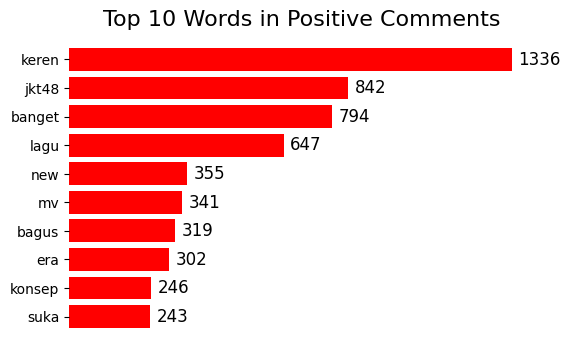

In [ ]:
# Top Words in Positive Comments

# Split the text into words and count occurrences
words = positive_text.split()
word_counts = Counter(words)

# Get the top 10 most common words and sort them in descending order
top_10_words = word_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' in descending order
top_10_df = top_10_df.sort_values(by='Count', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(top_10_df['Word'], top_10_df['Count'], color='red')

x_space = max(bar.get_width() for bar in bars) * 0.015

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + x_space,  # Position the label to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically
        f"{bar.get_width()}",
        va='center',  # Align label vertically in the center
        fontsize=12,
        color='black'
    )

# Customize the chart
plt.xlabel('')
plt.title('Top 10 Words in Positive Comments', fontsize=16)
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=10)
plt.box(False)  # Remove top and right borders

plt.show()

In [67]:
# Boxplot LikeCount & ReplyCount for Positive Comments

import seaborn as sns

# Filter for positive comments
positive_comments = comments[comments['Sentiment'] == 'positive']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for LikeCount and ReplyCount
sns.boxplot(data=positive_comments[['LikeCount', 'ReplyCount']])

# Customize the plot
plt.title('Boxplot of Like Count and Reply Count for Positive Comments', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Like Count', 'Reply Count'], fontsize=12)
plt.grid(axis='y')  # Optionally add a grid for better readability

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'seaborn'

# Neutral Sentiment

In [ ]:
# Word Cloud

In [ ]:
# Top Words in Neutral Comments

In [ ]:
# Boxplot LikeCount & ReplyCount for Neutral Comments


# Negative Sentiment